In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
import matplotlib.pyplot as plt
source_path = './source_data/FIG3/'

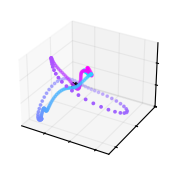

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# LOAD
# -------------------------
D = np.load(f"{source_path}/3d_vis_comps_vars.npz", allow_pickle=True)

norm_data = D["norm_data"]
clus_ids = D["clus_ids"]

# -------------------------
# RECREATE DERIVED DATA
# -------------------------
sig1 = np.mean(norm_data[clus_ids == 1], axis=0)
sig2 = np.mean(norm_data[clus_ids == 2], axis=0)
sig3 = np.mean(norm_data[clus_ids == 3], axis=0)

# -------------------------
# PLOT (IDENTICAL AESTHETICS)
# -------------------------
#(5,3)
fig = plt.figure(figsize=(2, 2.25))
ax = fig.add_subplot(projection='3d')

sc = ax.scatter(
    sig1,
    sig2,
    sig3,
    c=np.arange(len(sig1)),
    cmap='cool',
    label='Time (-1 to 0.4)s',
    s=3
)

ax.scatter(
    0, 0, 0,
    marker='X',
    s=20,
    color='k',
    zorder=5000
)

# Grid transparency (exact match)
ax.xaxis._axinfo["grid"]["color"] = (0.5, 0.5, 0.5, 0.1)
ax.yaxis._axinfo["grid"]["color"] = (0.5, 0.5, 0.5, 0.1)
ax.zaxis._axinfo["grid"]["color"] = (0.5, 0.5, 0.5, 0.1)
ax.set_xticks([0,1,2])
ax.set_yticks([-1,0,1])
ax.set_zticks([-1,0,1])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# -------------------------
# SAVE
# -------------------------
# plt.savefig(
#     "./current_composite/3d_vis_comps_reloaded.pdf",
#     dpi=800,transparent=True,
#     bbox_inches="tight"
# )

plt.show()


[Text(0, 0.5, 'E/I index'), Text(0.5, 0, 'Time rel. to IED (s)'), (-1.3, 0.8)]

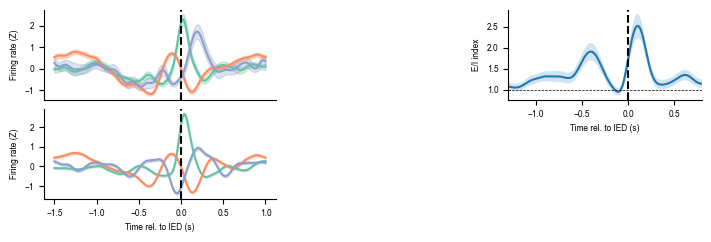

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
from matplotlib.gridspec import GridSpec

# ============================================================
# CREATE GRID
# ============================================================
fig = plt.figure(figsize=(7, 2.25))
gs = GridSpec(
    nrows=2,
    ncols=3,
    figure=fig,
    height_ratios=[1, 1],
    width_ratios=[1.2,0.8, 1],
    hspace=0.1,
    wspace=0.2
)
fig.subplots_adjust(left=0.05, right=0.99, top=0.99, bottom=0.15)

# ============================================================
# (0,0) — LONG-RANGE COMPS (LABELED)
# ============================================================
ax = fig.add_subplot(gs[0, 0])

D = np.load(f"{source_path}/long_range_comps_vars.npz", allow_pickle=True)
norm_data = D["norm_data"]
clus_ids = D["clus_ids"]
t_start = float(D["t_start"])
t_stop = float(D["t_stop"])

t_ar = np.linspace(t_start, t_stop, norm_data.shape[1])
pal = sns.color_palette("Set2").as_hex()
labels = ["Early act. (1)", "Suppression. (2)", "Late act. (3)"]

for i in range(1, 4):
    cur = norm_data[clus_ids == i]
    avg = np.mean(cur, axis=0)
    err = sem(cur, axis=0)

    ax.plot(t_ar, avg, color=pal[i - 1], label=labels[i - 1])
    ax.fill_between(t_ar, avg - err, avg + err, color=pal[i - 1], alpha=0.3)

ax.axvline(0, color='k', linestyle='--')
ax.set(ylabel='Firing rate (Z)', xticks=[], xlabel='')
#ax.legend(frameon=False, ncol=2, loc=(0, 0.7), columnspacing=0.75)

# ============================================================
# (1,0) — LONG-RANGE COMPS (ALL COLORS)
# ============================================================
ax = fig.add_subplot(gs[1, 0])

D = np.load(f"{source_path}/long_range_comps_all_cols_vars.npz", allow_pickle=True)
norm_data = D["norm_data"]
clus_ids = D["clus_ids"]
t_start = float(D["t_start"])
t_stop = float(D["t_stop"])

t_ar = np.linspace(t_start, t_stop, norm_data.shape[1])

for i in range(1, 4):
    cur = norm_data[clus_ids == i]
    avg = np.mean(cur, axis=0)
    err = sem(cur, axis=0)

    ax.plot(t_ar, avg, color=pal[i - 1])
    ax.fill_between(t_ar, avg - err, avg + err, color=pal[i - 1], alpha=0.3)

ax.axvline(0, color='k', linestyle='--')
ax.set(ylabel='Firing rate (Z)', xlabel='Time rel. to IED (s)')

ax = fig.add_subplot(gs[0:2, 1])
ax.set_visible(False)
# # ============================================================
# # (0,1)+(1,1) — 3D TRAJECTORY
# # ============================================================
# ax = fig.add_subplot(gs[0:2, 1], projection='3d')

# D = np.load("./source/3d_vis_comps_vars.npz", allow_pickle=True)
# norm_data = D["norm_data"]
# clus_ids = D["clus_ids"]

# sig1 = np.mean(norm_data[clus_ids == 1], axis=0)
# sig2 = np.mean(norm_data[clus_ids == 2], axis=0)
# sig3 = np.mean(norm_data[clus_ids == 3], axis=0)

# ax.scatter(
#     sig1, sig2, sig3,
#     c=np.arange(len(sig1)),
#     cmap='cool',
#     s=10
# )

# ax.scatter(0, 0, 0, marker='X', s=20, color='k', zorder=5000)

# ax.xaxis._axinfo["grid"]["color"] = (0.5, 0.5, 0.5, 0.1)
# ax.yaxis._axinfo["grid"]["color"] = (0.5, 0.5, 0.5, 0.1)
# ax.zaxis._axinfo["grid"]["color"] = (0.5, 0.5, 0.5, 0.1)

# ============================================================
# (0,2) — EI INDEX
# ============================================================
ax = fig.add_subplot(gs[0, 2])

D = np.load(f"{source_path}/ei_index_vars.npz", allow_pickle=True)
all_psth = D["all_psth"]
clus_ids = D["clus_ids"]
wv_type = D["wv_type"]
t_start = float(D["t_start"])
t_stop = float(D["t_stop"])

t_ar = np.linspace(t_start, t_stop, all_psth.shape[1])

array1 = all_psth[((clus_ids == 1) | (clus_ids == 3)) & (wv_type == 'RS')]
array2 = all_psth[(clus_ids == 2) | (wv_type == 'FS')]

mean_A = np.mean(array1, axis=0)
mean_B = np.mean(array2, axis=0)

SE_A = np.std(array1, axis=0, ddof=1) / np.sqrt(array1.shape[0])
SE_B = np.std(array2, axis=0, ddof=1) / np.sqrt(array2.shape[0])

metric = mean_A / mean_B
SE_metric = np.abs(metric) * np.sqrt((SE_A / mean_A)**2 + (SE_B / mean_B)**2)

ax.plot(t_ar, metric)
ax.fill_between(t_ar, metric + SE_metric, metric - SE_metric, alpha=0.2)

ax.axhline(1, linestyle='--', color='k', linewidth=0.5)
ax.axvline(0, color='k', linestyle='--')

ax.set(ylabel='E/I index', xlabel='Time rel. to IED (s)',xlim=[-1.3,0.8])

# ============================================================
# SAVE
# ============================================================
# plt.savefig(
#     "../figure_new/current_composite/long_range_row.pdf", transparent=True,
#     dpi=800,
# )


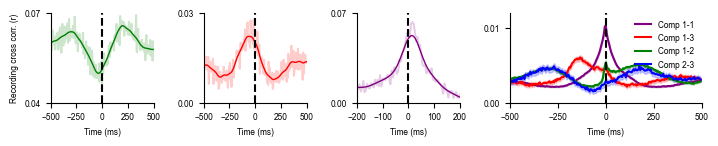

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import sem

# ================= LOAD DATA =================
# Sample connections
data = np.load(f'{source_path}/sample_conn_vars.npz', allow_pickle=True)
lags = data['lags']
conn11 = data['sample_conn_11']
conn12 = data['sample_conn_12']
conn13 = data['sample_conn_13']

# Summary connections
data_sum = np.load(f'{source_path}/summary_conn_vars.npz', allow_pickle=True)
sigs = data_sum['sigs']
t_bin = data_sum['t_bin'].item()

lags_sum = np.arange(
    -100 * t_bin * 1000,
     100 * t_bin * 1000,
     t_bin * 1000
)

# ================= FIGURE =================
fig, axs = plt.subplots(
    1, 4,
    figsize=(7, 1.25),
    gridspec_kw=dict(wspace=0.4),width_ratios=[0.7,0.7,0.7,1.3]
)
fig.subplots_adjust(left=0.06, right=0.99, top=0.97, bottom=0.25)


# ---------- PANEL 1 — conn12 ----------
ax = axs[0]
smoothed = gaussian_filter1d(conn12, 4)
ax.plot(lags, conn12, alpha=0.2, color='g')
ax.plot(lags, smoothed, linewidth=1, color='g')
ax.axvline(0, color='k', linestyle='--')
ax.set(xlabel='Time (ms)', ylabel='Recording cross corr. (r)',yticks=[0.04,0.07],ylim=[0.04,0.07], xlim=[-500, 500])


# ---------- PANEL 2 — conn13 ----------
ax = axs[1]
smoothed = gaussian_filter1d(conn13, 4)
ax.plot(lags, conn13, alpha=0.2, color='r')
ax.plot(lags, smoothed, linewidth=1, color='r')
ax.axvline(0, color='k', linestyle='--')
ax.set(xlabel='Time (ms)',yticks=[0,0.03],ylim=[0,0.03], xlim=[-500, 500])

# ---------- PANEL 3 — conn11 ----------
ax = axs[2]
smoothed = gaussian_filter1d(conn11, 4)
ax.plot(lags, conn11, alpha=0.2, color='purple')
ax.plot(lags, smoothed, linewidth=1, color='purple')
ax.axvline(0, color='k', linestyle='--')
ax.set(xlabel='Time (ms)', xlim=[-200, 200],yticks=[0,0.07],ylim=[0,0.07])

# ---------- PANEL 4 — summary ----------
ax = axs[3]
colors = ['purple', 'r', 'g', 'b']
labels = ['Comp 1-1', 'Comp 1-3', 'Comp 1-2', 'Comp 2-3']

for sig, col, lab in zip(sigs, colors, labels):
    avg = sig.mean(0)
    err = sem(sig, axis=0)
    ax.plot(lags_sum, avg, color=col, label=lab)
    ax.fill_between(
        lags_sum,
        avg - err,
        avg + err,
        color=col,
        alpha=0.2,
        label='_no'
    )

ax.axvline(0, color='k', linestyle='--')
ax.set(xlabel='Time (ms)',yticks=[0,0.01],ylim=[0,0.012],xlim=[-500,500],xticks=[-500,-250,0,250,500])
ax.legend(frameon=False)

# ================= SAVE =================
# fig.savefig(
#     './current_composite/conn_row.pdf',
#     dpi=800,transparent=True
#     #bbox_inches='tight'
# )

plt.show()


SignificanceResult(statistic=-0.4226712639105305, pvalue=1.6199865564669556e-13) 279
SignificanceResult(statistic=-0.3430954278125593, pvalue=2.4221660452788477e-08) 251
SignificanceResult(statistic=0.07704657411553964, pvalue=0.31085318688693714) 175


/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92092/2258278606.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92092/2258278606.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
/var/folders/cl/sjgtx3y51792n2h_w3pck2q80000gn/T/ipykernel_92092/2258278606.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(


[(6000.0, 0.0),

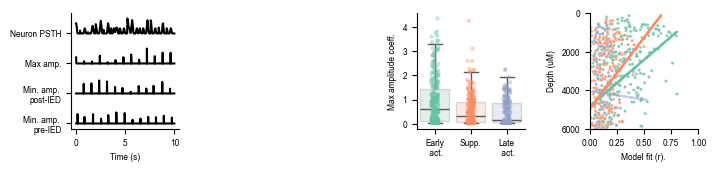

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

# ----------------------------
# CREATE 1x4 FIGURE
# ----------------------------
fig, axes = plt.subplots(1, 4, figsize=(7, 1.5), gridspec_kw={'wspace': 0.6})
fig.subplots_adjust(left=0.09, right=0.985, top=0.97, bottom=0.2)

# ----------------------------
# PANEL 1: PSTH + FEATURE STACK
# ----------------------------
ax = axes[0]

data = np.load(f"{source_path}/psth_feat_stack_vars.npz", allow_pickle=True)
psth_ied = data['psth_ied']
feats = data['feats']
n = int(data['n'])
t_start = int(data['t_start'])
t_stop = int(data['t_stop'])

Y = psth_ied[:, :, n]
keep = np.sum(Y, axis=1) > 0
Y = np.concatenate(list(Y[keep]), axis=0).reshape((-1, 1))
X = np.concatenate(list(feats[keep]), axis=0)

for i, x in enumerate(np.flip(X.T, axis=0)):
    x_plt = x[int(100 * t_start):int(100 * t_stop)]
    t_ar = np.linspace(0, t_stop - t_start, x_plt.shape[0])

    ax.plot(
        t_ar,
        i * 2 + x_plt,
        color='k'
    )

psth_sig = Y[int(100 * t_start):int(100 * t_stop)]

ax.plot(
    t_ar,
    (i + 1) * 2 + psth_sig / np.max(psth_sig),
    color='k'
)

ax.set(
    yticks=[0, 2, 4, 6],
    yticklabels=[
        'Min. amp. \npre-IED',
        'Min. amp. \npost-IED',
        'Max amp.',
        'Neuron PSTH'
    ],
    xticks=[0, 5, 10],
    xlabel='Time (s)'
)


# ----------------------------
# PANEL 2: EMPTY AXIS
# ----------------------------
axes[1].axis('off')

# ----------------------------
# PANEL 3: BOX + STRIP PLOT
# ----------------------------
ax = axes[2]

data = np.load(f"{source_path}/slope_weight_by_kmean_vars.npz", allow_pickle=True)
plt_df = pd.DataFrame(data["data"], columns=data["columns"])
box_df = plt_df.copy()
plt_df.to_csv('./statistical_source/FIG3/panelk.csv')

sns.boxplot(
    ax=ax,
    data=plt_df,
    x='k_mean_id',
    y='max_slope_amp_coeff',
    palette='Set2',
    fliersize=0,
    boxprops=dict(alpha=0.2)
)

sns.stripplot(
    ax=ax,
    data=plt_df,
    x='k_mean_id',
    y='max_slope_amp_coeff',
    palette='Set2',
    s=3,
    alpha=0.4
)

ax.set(
    ylabel='Max amplitude coeff.',
    xticklabels=['Early\n act.', 'Supp.', 'Late\n act.'],
    xlabel=''
)

# ----------------------------
# PANEL 4: DEPTH vs MODEL FIT
# ----------------------------
ax = axes[3]

data = np.load(f"{source_path}/slope_weight_by_depth_vars.npz", allow_pickle=True)
plt_df = pd.DataFrame(data["data"], columns=data["columns"])
plt_df.to_csv('./statistical_source/FIG3/panell.csv')

sns.scatterplot(
    ax=ax,
    data=plt_df[plt_df.depth < 6000],
    x='r',
    y='depth',
    hue='k_mean_id',
    palette='Set2',
    legend=None,
    s=5,
    alpha=0.8
)

ax.invert_yaxis()
ax.set(
    ylabel='Depth (uM)',
    xlabel='Model fit (r).',
    xlim=[0, 1]
)

alphas = [1, 1, 0.5]
for k in range(1, 4):
    model = LinearRegression()
    x = plt_df[plt_df.k_mean_id == k].r.values.reshape(-1, 1)
    y = plt_df[plt_df.k_mean_id == k].depth.values

    print(spearmanr(x, y),len(x))
    model.fit(x, y)
    y_pred = model.predict(x)
    ax.plot(x, y_pred, color=sns.color_palette('Set2')[k-1], alpha=alphas[k-1])

ax.set(ylim=[6000,0],yticks=[0,2000,4000,6000])
# ----------------------------
# SAVE + SHOW
# ----------------------------
#plt.savefig("./current_composite/encoding_row.pdf", dpi=800,transparent=True)#, bbox_inches='tight')
#plt.show()


In [11]:
from scipy.stats import ranksums
print(ranksums(box_df[box_df.k_mean_id == 1].max_slope_amp_coeff,
         box_df[box_df.k_mean_id == 2].max_slope_amp_coeff))

print(ranksums(box_df[box_df.k_mean_id == 1].max_slope_amp_coeff,
         box_df[box_df.k_mean_id == 3].max_slope_amp_coeff))


print(np.sum(box_df.k_mean_id ==1))
print(np.sum(box_df.k_mean_id ==2))
print(np.sum(box_df.k_mean_id ==3))

RanksumsResult(statistic=4.735743312039902, pvalue=2.182536846333078e-06)
RanksumsResult(statistic=5.759515304485022, pvalue=8.435581117094002e-09)
279
251
175


In [7]:
box_df

,k_mean_id,max_slope_amp_coeff
0,1.0,0.033603
1,2.0,1.332021
2,2.0,0.883553
3,3.0,0.064253
4,3.0,0.052652
...,...,...
700,1.0,1.164366
701,1.0,2.833758
702,1.0,0.121963
703,2.0,1.181458


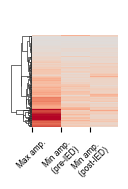

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- LOAD ----
data = np.load(f"{source_path}/weights_all_sites_vars.npz", allow_pickle=True)

enc_vectors_df = pd.DataFrame(
    data["data"],
    columns=data["columns"]
)

# ---- PLOT (IDENTICAL AESTHETICS) ----
clustermap = sns.clustermap(
    enc_vectors_df,
    method="centroid",
    col_cluster=False,
    cmap="coolwarm",
    figsize=(1.5, 2),
    vmin=-3,
    vmax=3,rasterized=True
)

# ---- MATCH AXIS FORMATTING ----
clustermap.ax_heatmap.set(yticks=[])
clustermap.cax.set_visible(False)

clustermap.ax_heatmap.set_xticks(
    range(3),
    labels=[
        "Max amp.",
        "Min amp.\n (pre-IED)",
        "Min amp.\n (post-IED)"
    ],
    rotation=45
)

# ---- SAVE ----
# plt.savefig(
#     "./current_composite/weights_all_sites_reloaded.pdf",transparent=True,
#     dpi=800,
#     bbox_inches="tight"
# )
plt.show()


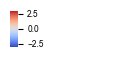

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- LOAD ----
data = np.load(f"{source_path}/weights_all_sites_vars.npz", allow_pickle=True)

enc_vectors_df = pd.DataFrame(
    data["data"],
    columns=data["columns"]
)

# ---- PLOT (IDENTICAL AESTHETICS) ----
clustermap = sns.clustermap(
    enc_vectors_df,
    method="centroid",
    col_cluster=False,
    cmap="coolwarm",
    figsize=(1.5, 2),
    vmin=-3,
    vmax=3,rasterized=True
)

# ---- MATCH AXIS FORMATTING ----
clustermap.ax_heatmap.set_visible(False)
clustermap.cax.set_visible(True)
clustermap.ax_row_dendrogram.set_visible(False)
clustermap.ax_heatmap.set_xticks(
    range(3),
    labels=[
        "Max amp.",
        "Min amp.\n (pre-IED)",
        "Min amp.\n (post-IED)"
    ],
    rotation=45
)

# ---- SAVE ----
# plt.savefig(
#     "./current_composite/weights_all_sites_reloaded_cmap.pdf",transparent=True,
#     dpi=800,
#     bbox_inches="tight"
# )
plt.show()


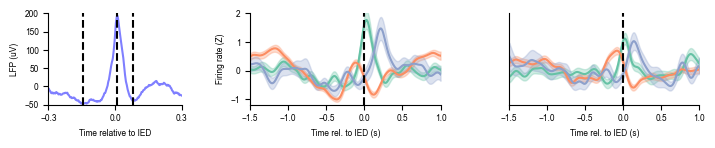

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import sem

# ============================================================
# GLOBAL FORMATTING (IDENTICAL)
# ============================================================


# ============================================================
# CREATE COMPOSITE FIGURE
# ============================================================
fig, axs = plt.subplots(
    1, 3,
    figsize=(7, 1.25),
    gridspec_kw=dict(width_ratios=[0.7, 1, 1],wspace=0.4)
)
fig.subplots_adjust(left=0.075, right=0.985, top=0.97, bottom=0.25)
fig.subplots_adjust(left=0.06, right=0.99, top=0.97, bottom=0.24)

# ============================================================
# PANEL 1 — SAMPLE IED FEATURES
# ============================================================
data = np.load(
    f"{source_path}/sample_ied_features_vars.npz",
    allow_pickle=True
)

lfp_ied = data['lfp_ied']
ex = int(data['ex'])

t = np.linspace(-0.3, 0.3, lfp_ied.shape[1])
ax = axs[0]

ax.plot(
    t,
    lfp_ied[ex],
    color='b',
    alpha=0.5
)

ax.axvline(
    t[np.argmax(lfp_ied[ex])],
    color='k',
    linestyle='--'
)

ax.axvline(
    t[np.argmin(lfp_ied[ex])],
    color='k',
    linestyle='--'
)

ax.axvline(
    t[np.argmin(lfp_ied[ex][150:]) + 150],
    color='k',
    linestyle='--'
)

ax.set(
    ylabel='LFP (uV)',
    xlabel='Time relative to IED',
    xticks=[-0.3, 0, 0.3],xlim=[-0.3,0.3],ylim=[-50,200]
)

# ============================================================
# PANEL 2 & 3 — LOW / HIGH AMP COMPARISONS
# ============================================================
D = np.load(
    f"{source_path}/low_high_amp_comps_vars.npz",
    allow_pickle=True
)

all_psth_top = D["all_psth_top"]
all_psth_bottom = D["all_psth_bottom"]
clus_ids = D["clus_ids"]
t_start = float(D["t_start"])
t_stop = float(D["t_stop"])

t_ar = np.linspace(t_start, t_stop, all_psth_top.shape[1])
pal = sns.color_palette("Set2").as_hex()

# ---- PANEL 2: TOP AMP ----
ax = axs[1]

for i in range(1, 4):
    cur_neurons = all_psth_top[clus_ids == i]
    avg_sig = np.mean(cur_neurons, axis=0)
    error_sig = sem(cur_neurons, axis=0)

    ax.plot(t_ar, avg_sig, color=pal[i - 1])
    ax.fill_between(
        t_ar,
        avg_sig - error_sig,
        avg_sig + error_sig,
        color=pal[i - 1],
        alpha=0.3
    )

ax.axvline(0, color='k', linestyle='--')
ax.set(
    ylabel='Firing rate (Z)',
    xlabel='Time rel. to IED (s)',
    ylim=[-1.2, 2],xlim=[-1.5,1]
)

# ---- PANEL 3: BOTTOM AMP ----
ax = axs[2]

for i in range(1, 4):
    cur_neurons = all_psth_bottom[clus_ids == i]
    avg_sig = np.mean(cur_neurons, axis=0)
    error_sig = sem(cur_neurons, axis=0)

    ax.plot(t_ar, avg_sig, color=pal[i - 1])
    ax.fill_between(
        t_ar,
        avg_sig - error_sig,
        avg_sig + error_sig,
        color=pal[i - 1],
        alpha=0.3
    )

ax.axvline(0, color='k', linestyle='--')
ax.set(
    ylim=[-1.2, 2],
    yticks=[],
    xlabel='Time rel. to IED (s)',xlim=[-1.5,1],
)

# ============================================================
# SAVE COMPOSITE
# ============================================================
# plt.savefig(
#     "./current_composite/ied_plus_amp_row.pdf",transparent=True,
#     dpi=800,
# )
plt.show()


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Time relative to IED (s)'),
 (-0.5, 0.5),
 (0.0, 10.0),

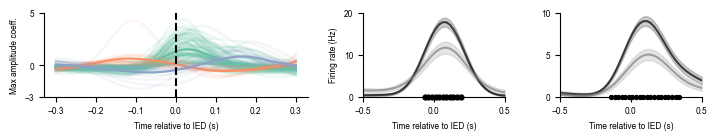

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem

# ============================================================
# Create 1 x 3 layout
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(7, 1.2),width_ratios=[1.3,.7,.7],gridspec_kw=dict(wspace=0.3))
ax1, ax2, ax3 = axes
fig.subplots_adjust(left=0.05, right=0.99, top=0.97, bottom=0.27)

# ============================================================
# PANEL 1 — Amp coeff over time (clusters)
# ============================================================
D = np.load(f"{source_path}/amp_coeff_timecourses_rs_gt_0p3.npz", allow_pickle=True)

t_ar = D["t"]
clusters = {1: D["k1"], 2: D["k2"], 3: D["k3"]}

colors = sns.color_palette("Set2", 3)

for k in [1, 2, 3]:
    data = clusters[k]

    ax1.plot(
        t_ar,
        data.T,
        color=colors[k-1],
        alpha=0.1
    )
    ax1.plot(
        t_ar,
        data.mean(axis=0),
        color=colors[k-1],
        linewidth=1.5
    )

ax1.axvline(0, color='k', linestyle='--')
ax1.set(
    ylabel='Max amplitude coeff.',
    xlabel='Time relative to IED (s)',
    ylim=[-3,5],yticks=[-3,0,5],
)

# ============================================================
# PANEL 2 — PSTH split (example 2)
# ============================================================
D = np.load(f"{source_path}/psth_amp_split_ex2.npz", allow_pickle=True)

data_top = D["data_top"]
data_bottom = D["data_bottom"]
t = D["t"]
signif_mask = D["signif_mask"]

cols = ['#000000','#857F7F']#['r', 'b'] 
labs = ['Top 25% Amp', 'Bottom 25% Amp']

for i, (data, c) in enumerate(zip([data_top, data_bottom], cols)):
    m = data.mean(0)
    s = sem(data, axis=0)
    ax2.plot(t, m, color=c, alpha=0.7, label=labs[i])
    ax2.fill_between(t, m + s, m - s, color=c, alpha=0.2)

ax2.scatter(
    t[signif_mask > 0],
    signif_mask[signif_mask > 0] - 1,
    color='k',
    s=12,clip_on=False
)

ax2.set(
    ylabel='Firing rate (Hz)',
    xlabel='Time relative to IED (s)',
    xlim=[-0.5, 0.5],
    ylim=[0, 20],
    yticks=[0, 10, 20],
    xticks=[-0.5,0,0.5],
)
#ax2.legend(frameon=False, loc=(0.8, 0.6))

# ============================================================
# PANEL 3 — PSTH split (example 1)
# ============================================================
D = np.load(f"{source_path}/psth_amp_split_ex1.npz", allow_pickle=True)

data_top = D["data_top"]
data_bottom = D["data_bottom"]
t = D["t"]
labs = D["labels"]
signif_mask = D["signif_mask"]

for data, c, lab in zip([data_top, data_bottom], cols, labs):
    m = data.mean(axis=0)
    s = sem(data, axis=0)
    ax3.plot(t, m, color=c, alpha=0.7, label=lab)
    ax3.fill_between(t, m + s, m - s, color=c, alpha=0.2)

ax3.scatter(
    t[signif_mask > 0],
    signif_mask[signif_mask > 0] - 1,
    color='k',
    s=8,clip_on=False
)

ax3.set(
    ylabel='',
    xlabel='Time relative to IED (s)',
    xlim=[-0.5, 0.5],
    ylim=[0, 10],
    yticks=[0, 5, 10],
    xticks=[-0.5,0,0.5],
)
#ax3.legend(frameon=False, fontsize=6)

# ============================================================
# Final layout
# ============================================================
#plt.savefig('./current_composite/first_row.pdf', dpi=800, transparent=True)

